1. SQL запросы для получения требуеймой информации. 

    1. Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model.

        ```sql 

            SELECT model, COUNT(flight_id) as flights_amount
            FROM aircrafts as a
            INNER JOIN flights as f ON a.aircraft_code = f.aircraft_code 
            WHERE EXTRACT(year from f.departure_time :: date) = '2018'
            AND EXTRACT(month from f.departure_time :: date) = '09'
            GROUP BY a.model
          ```
    2. Посчитайте количество рейсов по всем моделям самолётов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите её.
        ```sql 
            SELECT COUNT(flight_id) as flights_amount

            FROM aircrafts as a

            INNER JOIN flights AS f on a.aircraft_code = f.aircraft_code

            WHERE (model LIKE 'Boeing%' OR model LIKE 'Airbus%')
            AND EXTRACT(month from f.departure_time :: date) = '09' 

        ```
    3. Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
        ```sql
            SELECT Sub.city  as city,
                AVG(Sub.cnt) as average_flights
            FROM  (
                SELECT 
                    a.city,
                    COUNT(f.flight_id) as cnt,
                    EXTRACT(DAY FROM f.arrival_time :: date)
                FROM flights as f
                    INNER JOIN airports as a ON f.arrival_airport = a.airport_code
                WHERE EXTRACT(YEAR from arrival_time::date) = '2018'
                AND EXTRACT(MONTH from arrival_time::date) = '08'

                GROUP BY 
                    a.city,
                    EXTRACT(DAY FROM f.arrival_time :: date)
            ) as Sub
            GROUP BY city
        ```
    4. Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.
        ```sql
            SELECT   
                festival_name,
                EXTRACT(WEEK from festival_date) as festival_week
            FROM 
                festivals
            WHERE 
                festival_date BETWEEN '2018-07-23' AND '2018-09-30'
            AND 
                festival_city = 'Москва'
        ```
    5. Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество приобретённых билетов в Москву. 
        ```sql
            SELECT 
                T.week_number,
                T.ticket_amount,
                T.festival_week,
                T.festival_name
            FROM 
            (
            (SELECT
                  EXTRACT(week FROM flights.arrival_time) AS week_number,
                  count(ticket_flights.ticket_no) as ticket_amount
             FROM 
                flights
                inner join ticket_flights on flights.flight_id = ticket_flights.flight_id
                inner join airports on airports.airport_code = flights.arrival_airport
            where airports.city = 'Москва'
            and flights.departure_time :: date BETWEEN '2018-07-23' AND '2018-09-30'

            group by week_number
            ) t
            LEFT JOIN 
            (SELECT 		
                    festival_name,	
                    EXTRACT (week FROM festivals.festival_date) AS festival_week
                FROM 
                    festivals
                WHERE
                    festival_city = 'Москва'
                  AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30'
            ) t2 
            ON 
                t.week_number = t2.festival_week
            ) AS T;
        
        ```

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

# 1. Аналитика

In [4]:
import pandas as pd
from pprint import pprint 

# IMPORT csv


model_flights = pd.read_csv('../datasets/query_1.csv')
city_average = pd.read_csv('../datasets/query_3.csv')
last = pd.read_csv('../datasets/query_last.csv')

Задача:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;


In [5]:
pprint(model_flights.head())

pprint(city_average.head())

             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300
          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613


In [6]:
# Информация по типам данных в запросах

pprint(model_flights.info())
print()
pprint(city_average.info())
print()
pprint(last.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      floa

У нас 1 проблема в данных. Номер недели указан, как Float64. По факту это целочисленное значение. Заполним пропуским в этом поле нулями и конвертируем.

Остальные типы определенны корерктно. 

In [7]:
last['festival_week'] = last['festival_week'].fillna(0).astype('int')

Также у нас есть пропуски в наименовании вестивалей. Заменим на "None"

In [8]:
last.fillna('None', inplace = True)

In [9]:
pprint(model_flights.describe())
print()
pprint(city_average.describe())

       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000

       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


У нас 8 записей по моделям самолётов и кол-ву их полётов и 101 запись по городам и средему числу. Данные выглядят корректно. 

Кол-во полётов для каждого самолёта разнится от 300 до 4557. 
Среднее кол-во полётов для каждого сильно разнится, однако это может быть обусловлено размером самого города.

Выберем топ-10 городов по кол-ву полётов.

In [10]:
city_average.sort_values(by = "average_flights", ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


В топ вошли крупнейшие города России. Тут все корректно. 

### Графики


1. Модель самолетов и кол-во рейсов

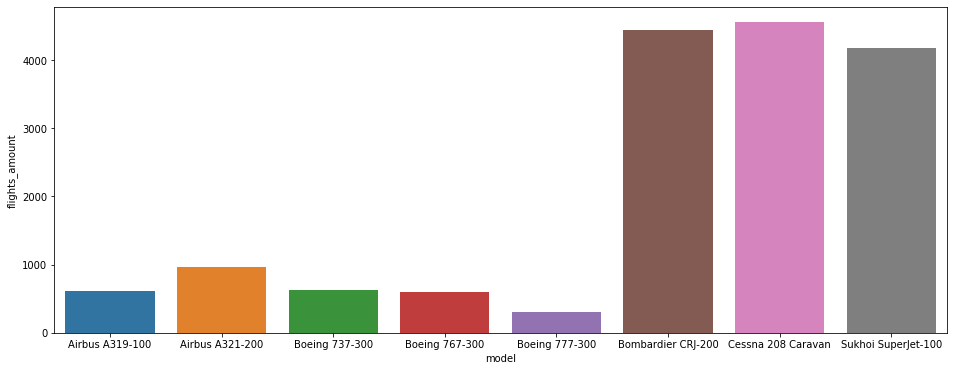

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16,6))

sns.barplot(data = model_flights, x = 'model', y = 'flights_amount')

По данному распределению можно сказать, что большую часть полётов совершают небольшие самолёты ~= локальные полёты.


### Cesna 208 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Cessna_208B_SKS_%28105090285%29.jpg/1200px-Cessna_208B_SKS_%28105090285%29.jpg" width = "250">


### Bombardier CRJ-200

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/J-AIR_CRJ200ER%28JA206J%29_%283504044273%29.jpg/1200px-J-AIR_CRJ200ER%28JA206J%29_%283504044273%29.jpg" width = "250">

2. Города и количество рейсов

In [12]:
city_average

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


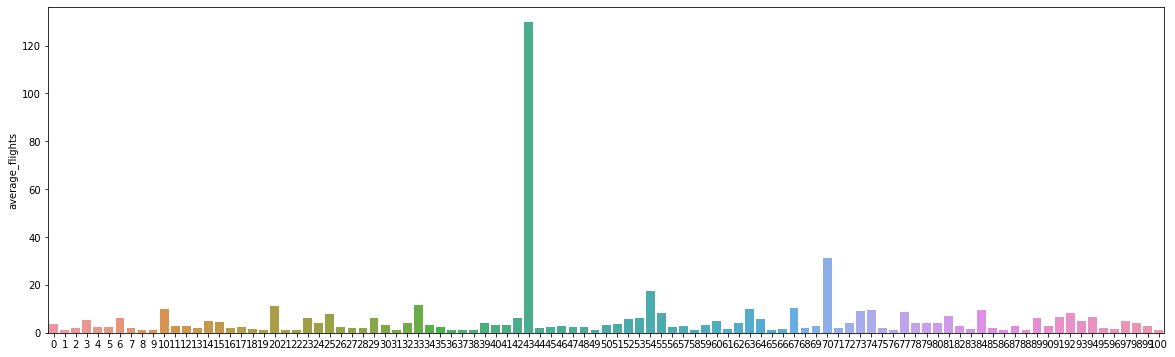

In [13]:
plt.figure(figsize = (20,6))

sns.barplot(data = city_average, x = city_average.index, y = 'average_flights')

По данному графику можно сказать, что есть определенные города с выделяющимся количеством полётов. Построим распределение для топ-10.

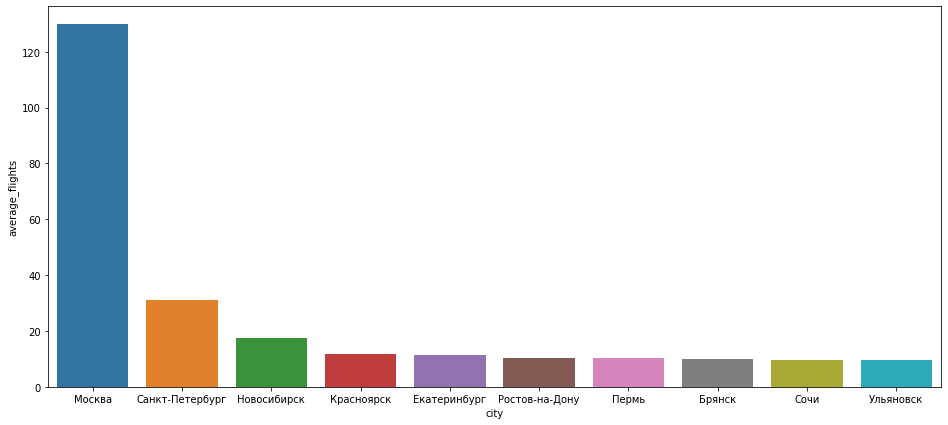

In [14]:
top10_cities = city_average.sort_values(by = "average_flights", ascending=False).head(10)

plt.figure(figsize = (16,7))

sns.barplot(data = top10_cities, x = 'city', y = 'average_flights')

По данному распределению видно доминирующие города. 

Очевидно, Москва лидерует, так как большое кол-во трафика обусловлено туристами и большим кол-вом аэропортов. 

In [15]:
import os

os.environ['API_KEY'] = '5011c4dd8af74a24b6c41535169338dc'

In [16]:
import requests
import json
import os

# API key in environ

def req_to_prov(city):
    """
    Выполняет запрос к провайдеру OpenCage. Получаем координаты городов и возвращаем
    """
    payload = {
        'q':city,
        'key':os.environ['API_KEY']
        }
    cities_trans = []
    r = requests.get('https://api.opencagedata.com/geocode/v1/json', params = payload)
    todos = json.loads(r.text)  
    lat = todos['results'][0]['geometry']['lat']
    lng= todos['results'][0]['geometry']['lng']
    lat_city = todos['results'][0]['formatted']
    
    return [lat_city,lat,lng]

def create_geometry(dataframe):
    
    """
    Создаем таблицу с координатами городов. Координатые получается через API OpenCage. 
    """
    cities = dataframe['city']
    geom = [req_to_prov(x) for x in cities]

    return geom


In [17]:
coord = create_geometry(city_average.sort_values(by='average_flights'))

In [18]:
import numpy as np

average = city_average['average_flights'].sort_values()
avg_log = average.apply(lambda x : np.log1p(x)).to_list()
coef = range(0,len(average.sort_values()-1)) 
city_name = [coord[i][0].split()[0] for i in range(len(avg_log))]

In [22]:
!pip install folium
!pip install webcolors

In [29]:
import folium
import webcolors

# Создаем карту. Location и зум - опытным путем, чтоб видно Россию
map = folium.Map(location=[61.5240097, 105.3187561], zoom_start=2)


# city_name - список наименований городов
for i in range(len(city_name)):

    
    # AVG_LOG - логарифмированные average_flights. "Нормализовали"
    # City - просто строка из имени города и avg
    
    city = f"{city_name[i]} - {avg_log[i]}"
    
    
    # Цвет меняется в связи со значением кол-ва полётов. 
    # Для цвета использовал библиотеку webcolors.
    """
    Цвет меняется в связи со значением кол-ва полётов. 
    Для цвета использовал библиотеку webcolors. Она умеет переводить процентные соотношения RGB в hex (#rrggbb). 
    Это упростит изменение цвета от нужного нам параметра. 
    
    Произвёл сортировку списка по avg и использовал новые индексы, как коеф. Т.е. 1 - минимальное кол-во полётов,
    100 - максимальное.
    Параметры по цвету подбирал эксп... просто опытным путём пока не понравились. 
    """
    color = webcolors.rgb_percent_to_hex((f'{coef[i]}%', f'{50-coef[i]}%', f'{100-coef[i]}%'))
    
    
    # Наносим кружки
    
    folium.CircleMarker(
        location=coord[i][1:], # координаты кружков. Можно использовать внешний API для получения
        radius=avg_log[i]*3, # Радиус, основанные на "нормированных" значениях полётов
        popup= city, # Название города появится по нажатию
        opacity = coef[i], # Прозрачность - коэф.
        color=color, # Цвет - то что ранее обозначили
        fill=True # Заполнять кружок цветом ли
    ).add_to(map) # Ну и наносим всё это) 

map

# Also add save screenshot to notebooks folder

У нас один "потерявшийся" город - Уфа. Так как координаты получали по Русскому названию - вероятно баг API провайдера. 

Построим графики по всем городам без Питера и Москвы. 

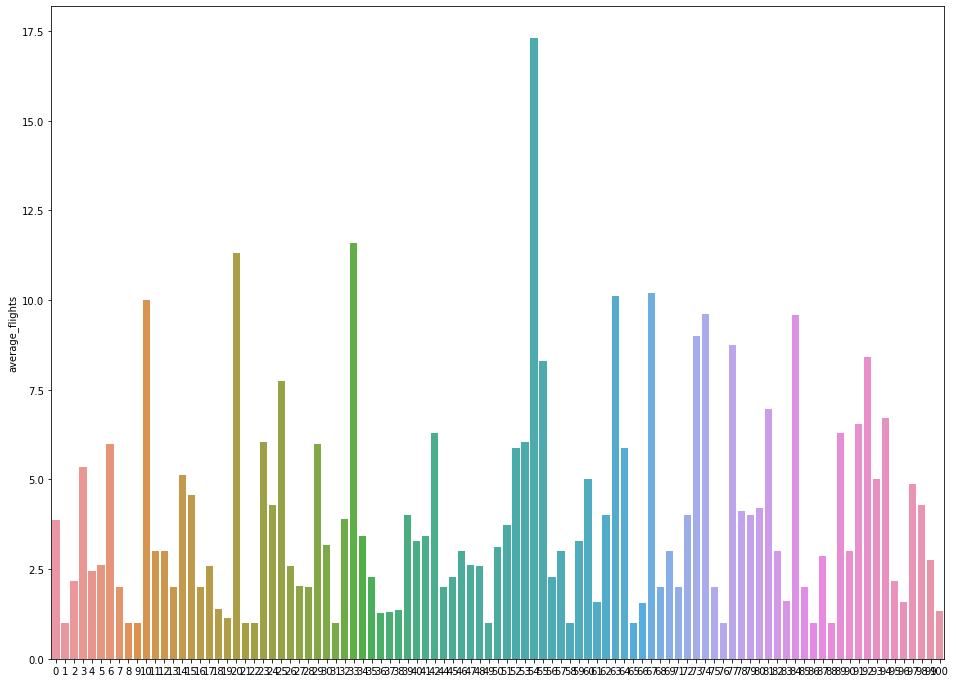

In [30]:
without_ms = city_average.query('city != "Москва" and city != "Санкт-Петербург"')

plt.figure(figsize = (16,12))

sns.barplot(
    data = without_ms,
    x = without_ms.index,
    y = without_ms['average_flights']
)

Распределение выравнивается, однако все равно имеются множество пиков. Попробуем убрать города-миллионники

In [31]:
without_ms

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [32]:
import bs4
import re
html = "https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"

r=requests.get(html)
url=r.content
soup = bs4.BeautifulSoup(url,'html.parser')

In [33]:
tab = soup.find("table",{"class":"wikitable"})
links = re.findall('title="[А-я\S]*"',str(tab))

In [34]:
city_bil = [links[i].split('"')[1] for i in range(len(links))]
city_bil

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Челябинск',
 'Омск',
 'Самара',
 'Ростов-на-Дону',
 'Уфа',
 'Красноярск',
 'Пермь',
 'Воронеж',
 'Волгоград']

In [35]:
city_average.index = city_average['city'] 

In [36]:
without_bil = city_average.drop(city_bil)

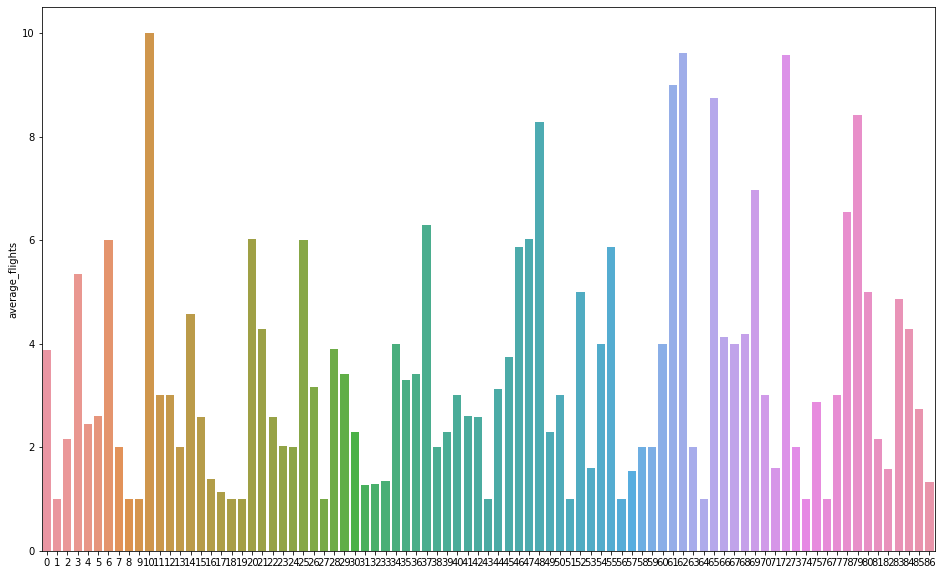

In [37]:
plt.figure(figsize = (16,10))
sns.barplot(data = without_bil, x = without_bil.reset_index(drop = True).index, y = 'average_flights')

Количество явных выбросов сократилось. 

# 2. Проверка гипотезы

Задача:

* Проверьте гипотезу: **«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»**. 


Составим гипотезы:
* Н0 - спрос на билеты во время фестивалей не отличается от среднего спроса в обычные дни
* Н1 - спрос на билеты во время фестивалей **отличается** от среднего спроса в обычные дни

Пороговое значение установим в 0.05

У нас есть две выборки: одна - количество пассажиров, совершающих перелеты, на каждую неделю, когда были фестивали. Другая - количество пассажиров, совершающих перелеты, когда не было фестивалей. Это две независимые выборки. Мы проверяем средние значения у двух независимых выборок. Для этого теста используют критерий стьюдента.


In [38]:
# Preapare data

fest_am = last[last['festival_week'] >0]['ticket_amount']
non_fest = last[last['festival_week'] == 0]['ticket_amount']

In [39]:
from scipy import stats as st

alpha = .05

result = st.ttest_ind(fest_am,non_fest, equal_var = False)

if result.pvalue >= alpha:
    print(f"P-val = {result.pvalue}\nАльтернативная гипотеза отклонена. Средний спрос не отличается.")
else:
    print(f"P-val = {result.pvalue}\Нулевая гипотеза отклонена. Средний спрос отличается.")

P-val = 0.377432493172683
Альтернативная гипотеза отклонена. Средний спрос не отличается.


## Общий вывод.


В процессе нашего анализа было установлено:

* Большая часть полётов выполнена малыми самолётами ~= локальные полёты. 
* Распределение по кол-ву полётов из городов относительно равномерно распределно, однако имеются выделяющиеся значения
* Согласно топ-10 городов видно, что лидирующие позиции у крупнейших городов - Москва, Питер, Новосибирск
* Мы опровергли альтернативную гипотезу. Средний спрос по билетам в недели фестивалей и без не отличается. 

Такой вывод может быть обусловлен тем, что у нас имеется мало данных. 